In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from scipy import stats

In [201]:
n_starred = 6438
n_atzar = 30
n_weeks = 5

In [148]:
songs = [f'{x+1}' for x in range(n_starred)]

In [203]:
x = []

for w in range(n_weeks):

    dups = []

    for i in range(5000):

        results = []

        for i in range(w+2):
            chosen_songs = np.random.choice(songs, size=n_atzar, replace=False)
            results.append({
                'week': i+1,
                'songs': chosen_songs
            })

        df = pd.DataFrame(results)
        exploded = df.explode('songs')

        n_duplicated = exploded.songs.duplicated().sum()
        dups.append(n_duplicated)

    mean = np.mean(dups)
    pois = stats.poisson(mu=mean)
    prob = 1 - pois.pmf(0)
    x.append({
        'n_weeks': w+2,
        'prob_at_least_one_duplicate': prob
    })

In [206]:
df = pd.DataFrame(x)

In [210]:
df

,n_weeks,prob_at_least_one_duplicate
0,2,0.136188
1,3,0.332222
2,4,0.578021
3,5,0.753748
4,6,0.876214


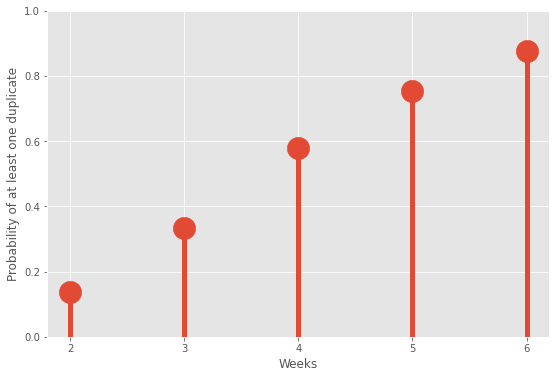

In [209]:
fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(df.n_weeks, df.prob_at_least_one_duplicate, s=500)
ax.set_xticks(df.n_weeks)
ax.set_xticklabels([f'{x}' for x in df.n_weeks])
ax.set_xlabel('Weeks')
ax.set_ylabel('Probability of at least one duplicate')
ax.set_ylim(0,1)
for w in df.n_weeks:
    ax.axvline(w, ymax=df.prob_at_least_one_duplicate[w-2], lw=5);